# Métodos numéricos




A modo utilizar estos métodos para resolver alguna EDO usaremos el lenguaje de Python para su implementación. Para ello veremos dos herramientas que nos facilitarán este trabajo, la librería de arreglos de __Numpy__ y la librería de gráficos __Matplotlib__. 

__Observación:__ estas librerías no vienen dentro de Python, se deben instalar previamente para su uso. Se recomienda utilizar Anaconda, que pueden descargar [aquí](https://www.anaconda.com/distribution/#download-section), allí pueden usar el entorno de programación Spyder que contiene todas estas librerías y mucho más. También pueden usar los notebooks de google colab (que ven ahora mismo) que también las poseen.


In [0]:
# Partimos exportanto ambas librerías

import matplotlib.pyplot as plt       
import numpy as np                    

# El comando "as" hace que cada vez que queramos llamar alguna función de estas
# librerias solo tengamos que poner con antelación el nombre que se le haya
# puesto, en estos casos, por convención, se suele utilizar "np" para Numpy y
# y "plt" para matplotlib.pyplot

## Arreglos de Numpy

Como sabrán, Python posee sus propios arreglos, y en ellos podemos introducir cualquier cosa que queramos, pueden ser _strings_, _objetos_, _enteros_, _floats_ , etc. Además podemos modificar su tamaño y añadir elementos cuando queramos. Esto los hace que no sean arreglos formalmente hablando y les hace perder eficiencia, es por ello que utilizaremos los arreglos de Numpy, que resultan ser mucho más eficientes y además traen un montón de funciones útiles para su operatoria. 

Partamos por crear arreglos de Numpy:

In [2]:
# Creación de arreglos de numpy
# Hay muchas manera de crearlos, pero veremos aquellas que nos sirvan

a = np.array(["hola","tu","me",1]) 
b = np.array([1,2,3,4,5,6,7,8,9,10])

print(a)
print(b)

['hola' 'tu' 'me' '1']
[ 1  2  3  4  5  6  7  8  9 10]


In [3]:
# Donde puedo pedir los elementos según su índice

print("El primer elemento: ", b[0]) 
print("El último elemento: ", b[-1])
print("Subconjunto del arreglo, por ejemplo, desde el elemento en la posición 3 al 7: ", b[3:8]) 

# Observemos que el "1" que se coloco como un entero en el arreglo "a", al pedirlo
# desde el arreglo, no arroja un entero. Esto es porque numpy necesita que los 
# elementos sean de un mismo tipo!

print( a[3]+ ",",type(a[3]))
print("¿Es a[3] un entero?: ", a[3] == int)


El primer elemento:  1
El último elemento:  10
Subconjunto del arreglo, por ejemplo, desde el elemento en la posición 3 al 7:  [4 5 6 7 8]
1, <class 'numpy.str_'>
¿Es a[3] un entero?:  False


In [4]:
# Funciones útiles de creación de arreglos 

c = np.zeros(10)           # arreglo de 10 ceros :)
d = np.arange(10)          # arreglo de 10 enteros concecutivos desde el 0
e = np.linspace(0,10,12)   # arreglo equiespaciado, que parte en 0 y termina en 10
                           # con 12 elementos

print("Arreglo de ceros: ", c)
print("Arreglo de 10 enteros concecutivos: ",d)
print("Arreglo equiespaciado desde 0 a 10: ",e)

Arreglo de ceros:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Arreglo de 10 enteros concecutivos:  [0 1 2 3 4 5 6 7 8 9]
Arreglo equiespaciado desde 0 a 10:  [ 0.          0.90909091  1.81818182  2.72727273  3.63636364  4.54545455
  5.45454545  6.36363636  7.27272727  8.18181818  9.09090909 10.        ]


No solo hay arreglos, también podemos crear matrices.

In [5]:
m1 = np.zeros((3,3)) # Matriz de 3x3 de zeros
print("Matriz cuadrada de ceros")
print(m1)

# Puedo acceder a estos números y modificarlos, transformémosla en la identidad

m1[0][0] = 1
m1[1][1] = 1
m1[2][2] = 1

print("Matriz identidad 3x3")
print(m1)

# O puedo obtener una matriz identidad de nxn más fácilmente con una función.
m2 = np.identity(5)
print("Matriz identidad de 5x5")
print(m2)

# Puedo cambiar una fila completa
a = np.arange(5)
m2[2] = a

print("Matriz m2 modificada: ")
print(m2)

Matriz cuadrada de ceros
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Matriz identidad 3x3
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Matriz identidad de 5x5
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
Matriz m2 modificada: 
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 2. 3. 4.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


__Comentario__: Numpy también incluye operatoria entre arreglos y matrices, además de múltiples funciones matemáticas, entre ellas operatoria vectorial y matricial.
Todo esto lo pueden ver en la documentación completa de la librería [en este lindo enlace](https://docs.scipy.org/doc/numpy/) o siempre lo que necesiten pueden buscarlo en Google.

## Matplotlib
Esta librería es aquella que nos permitirá hacer todo tipo de gráficos. 

Para ver su funcionalidad veamos el ejemplo de graficar la función $f(x) = |sen(x)|$, entre $-2\pi$ y $2\pi$.




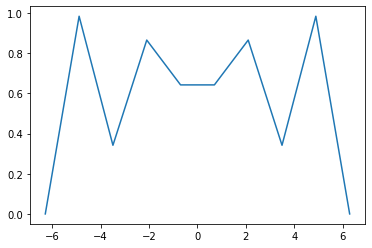

In [6]:
# Partimos definiendo 2 arreglos, uno que será el eje "x" y otro a rellenar con 
# los valores de la función en cada punto. Para que la gráfica sea posible, 
# ambos arreglos deben tener el mismo largo
# Una función muy útil es linspace para el eje "x" gracias a su equiespaciado.

eje_x = np.linspace(-2*np.pi,2*np.pi,10)
eje_y = np.zeros(10)

# Creamos una función que haga la operatoria por nosotros
def funcion_a_graficar(x):
  return np.absolute(np.sin(x))
  
# recorremos el eje_y rellenando con los valores correspondientes
for i in range(len(eje_x)):
  eje_y[i] = funcion_a_graficar(eje_x[i])

plt.plot(eje_x,eje_y)  # se crea la gráfica
plt.show()             # se muestra

Notamos que la función no se parece a lo que esperabamos, el problema aquí es que la gráfica se realiza uniendo todos los puntos con líneas rectas, por ende, mientras más puntos grafiquemos mejor será nuestro resultado en cuanto a "suavidad" de la gráfica. 

Le agregaremos más puntos, títulos, nombres a los ejes, color a la gráfica y le cambiaremos el tamaño.

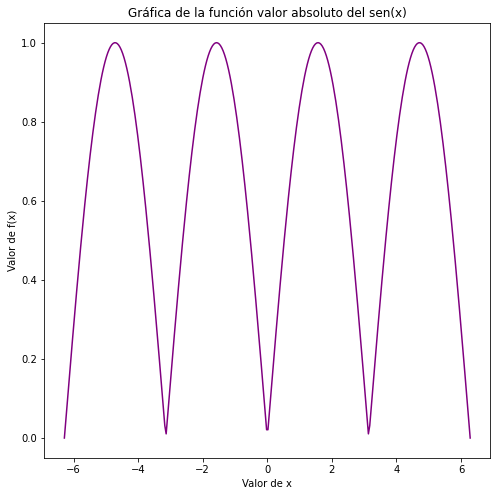

In [7]:
eje_x = np.linspace(-2*np.pi,2*np.pi,300)
eje_y = np.zeros(300)

def funcion_a_graficar(x):
  return np.absolute(np.sin(x))

for i in range(len(eje_x)):
  eje_y[i] = funcion_a_graficar(eje_x[i])


plt.figure(figsize=(8,8))                                    # cambio de tamaño
plt.plot(eje_x,eje_y, color = "purple")                      # gráfica y se añade color
plt.xlabel("Valor de x")                                     # nombre al eje x
plt.ylabel("Valor de f(x)")                                  # nombre al eje y
plt.title("Gráfica de la función valor absoluto del sen(x)") # título
plt.show()                                                 


Una vez más, esta librería tiene muchas cosas para añadir a sus gráficos, desde leyendas, colores, o lo que se imaginen es altamente probable que esté incorporado, por ello, para saber más revisen la documentación [aquí](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.html), también en internet hay muchos tutoriales buenos al respecto como [este](https://claudiovz.github.io/scipy-lecture-notes-ES/intro/matplotlib/matplotlib.html#introduccion).

## Implementación de métodos númericos

Un método númerico se enfoca en resolver el problema de Cauchy de la siguiente forma: 
\begin{equation*}
\left.
\begin{aligned}
y'(x) &= f(x,y(x)), \forall x \in [x_0,x_0+L] \\
y(x_0) &= y_0 
\end{aligned}
\right\}
\quad\text{P.C.}
\end{equation*}
Para ello, el intervalo de interés de la solución se discretizará según cuanto queramos dividir dicho intervalo, en general,  dividir más el intervalo (aumentar el número de pasos) creará una mejor aproximación de la solución. 

Definiremos:
 $$h = \frac{L}{n} \space \text{(paso de discretización)}$$   
 $$\implies x_n = x_0 + nh $$ 

Además, consideramos el paso inicial como $y_0 = y(x_0)$.

Ahora, sin escatimar mucho en detalles teóricos, presentamos las reglas de cálculo de 3 métodos numéricos:




*   Método de Euler progresivo: hace aproximaciones a través de rectángulos, donde la regla del paso siguiente es: 
$$y_{n+1} = y_n+hf(x_n,y_n) $$

*   Método de Heun: hace aproximaciones a través de trapecios, para ello considera un paso intermedio, que se estima mediante el método de Euler progresivo, es decir, consideramos ese paso intermedio como:
$$\hat{y}_{n+1} =  y_n+hf(x_n,y_n) $$
Por lo tanto se tendría que el paso siguiente es:
$$ y_{n+1} = y_n +\frac{h}{2}\left[ f(x_n,y_n) + f(x_{n}+h,\hat{y}_{n+1})\right]$$
* Método Runge Kutta de orden 4:  plantea el cálculo de 4 constantes para luego dar el siguiente paso, es decir, se definen las siguientes variables
$$g_1= f(x_n,y_n) $$ 
$$ g_2 = f(x_n+\frac{h}{2}, y_n+\frac{h}{2}g_1)$$
$$g_3 = f(x_n+\frac{h}{2}, y_n+\frac{h}{2}g_2) $$
$$g_4 = f(x_n+h,y_n+hg_3) $$
Finalmente, la regla de paso siguiente es
$$y_{n+1} = y_n + \frac{h}{6}(g_1+2g_2+2g_3+g_4) $$





Ahora haremos un par de ejemplos ejemplos de implementación, consideremos la siguiente EDO: 
$$ y' = \frac{2}{x+1}y+(x+1)^2 \text{,} \space y(0) = 0$$
En clase auxiliar se resolvió esta EDO, ahora, aplicando condiciones las iniciales se obtiene que la solución es:
$$y(x) = x(x+1)^2 $$


Compararemos la solución analítica con la solución numérica, para ello resolveremos númericamente en el intervalo $[0,10]$.

Notamos que $f(x,y) = \frac{2}{x+1}y+(x+1)^2$.

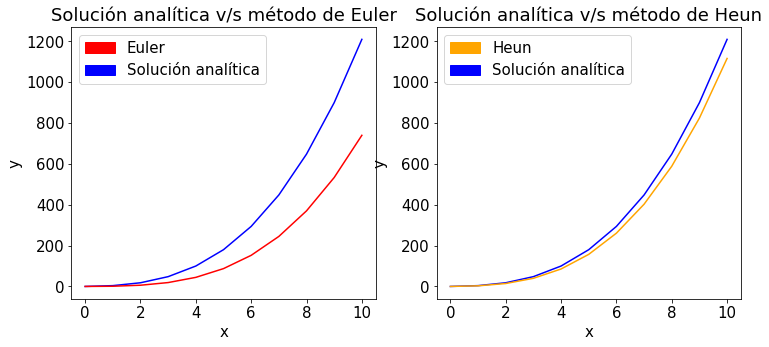

In [69]:
estado_inicial = np.array([0,0]) # creamos las condiciones iniciales en un arreglo

def ecuacion(x_n,y_n):                    # retorna f(x_n,y_n)
  aux = (2.0/(x_n+1.0))*y_n + (x_n+1.0)**2
  return aux

def pasoEuler(h,x_n,y_n):                # calcula cuanto hay que sumar para pasar 
  f_n = ecuacion(x_n,y_n)                # del paso y_n al y_{n+1} en el método de Euler
  return h*f_n

def pasoHeun(h,x_n,y_n):                 # análogo a pasoEuler pero con el método de Heun
  paso_intermedio = y_n+h*ecuacion(x_n,y_n)    
  aux = ecuacion(x_n,y_n)+ecuacion(x_n+h,paso_intermedio)
  return aux*(h/2.0)

# Ahora solo hace falta discretizar el intervalo [0,10] para ello es ideal
# usar la función linspace que nos provee Numpy, donde el paso de discretización
# será simplemente la diferencia entre dos números concecutivos del arreglo

eje_x = np.linspace(0.0,10.0, 11)
eje_x[0] = estado_inicial[0]           # le entregamos el punto inicial
h = eje_x[1]-eje_x[0]
n_iteraciones = 10 

# El número de iteraciones es 10 ya que hay un punto que ya tenemos, que son las
# condiciones iniciales

eje_y_Euler = np.zeros(11)           # arreglo del eje y que será rellenado según la regla respectiva
eje_y_Euler[0] = estado_inicial[1]         # le entregamos su estado inicial

# Ahora recorremos el arreglo del eje "y" actualizando cada valor
i = 0
while i < n_iteraciones:
   eje_y_Euler[i+1] = eje_y_Euler[i]+pasoEuler(h,eje_x[i],eje_y_Euler[i])
   i+=1
# Hacemos lo mismo para el método de Heun

eje_y_Heun = np.zeros(11)
eje_y_Heun[0] = estado_inicial[1]
i = 0
while i < n_iteraciones:
   eje_y_Heun[i+1] = eje_y_Heun[i]+pasoHeun(h,eje_x[i],eje_y_Heun[i])
   i+=1

# Añadiremos la solución analítica a modo de comparación.
def solucion_analitica(x):
  return x*(x+1)**2

eje_y_analitico = np.zeros(11)
# Rellenamos el eje "y" para la solución analítica
for i in range(len(eje_x)):
  eje_y_analitico[i] = solucion_analitica(eje_x[i])

# Falta graficar solamente
# Haremos una pequeña leyenda
import matplotlib.patches as mpatches

blue_patch = mpatches.Patch(color = "blue", label = "Solución analítica")
red_patch = mpatches.Patch(color='red', label='Euler')
orange_patch = mpatches.Patch(color= "orange" , label = "Heun")

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)                 # Esto es para hacer varios gráficos a la vez

plt.plot(eje_x,eje_y_analitico, color = "blue")
plt.plot(eje_x,eje_y_Euler, color = "red")
plt.title("Solución analítica v/s método de Euler")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(handles=[red_patch, blue_patch])

plt.subplot(1,2,2)
plt.plot(eje_x,eje_y_analitico, color = "blue")
plt.plot(eje_x,eje_y_Heun, color = "orange")
plt.title("Solución analítica v/s método de Heun")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(handles=[orange_patch, blue_patch])

plt.show()

Observemos que a pesar de ser pocas iteraciones, solamente 10, la solución numérica se acerca bastante bien a la solución analítica. Aquí apreciamos claramente la diferencia entre el error entre el método de Euler y el de Heun, donde este último parece cometer mucho menos error. 

Pueden modificar levemente el código para aumentar las iteraciones y obtener gráficas mucho más suaves y soluciones numéricas mucho más precisas.

Ahora que ya sabemos como funcionan los métodos numéricos, aprovechemos su "poder" para resolver una EDO que, aparentemente, es imposible de resolver por métodos comunes.

Consideremos la siguiente EDO:

$$ y' = \ln(\sin^2(x+y)+1)-cos(y) \space \text{, } y(0) = 1$$

Como no tenemos un método para resolverla de forma exacta, para saber su comportamiento la resolveremos numéricamente en el intervalo $[0,20]$. 

En este caso usaremos el método de Runge Kutta de orden 4, este resulta ser el método más preciso de todos los descritos. 

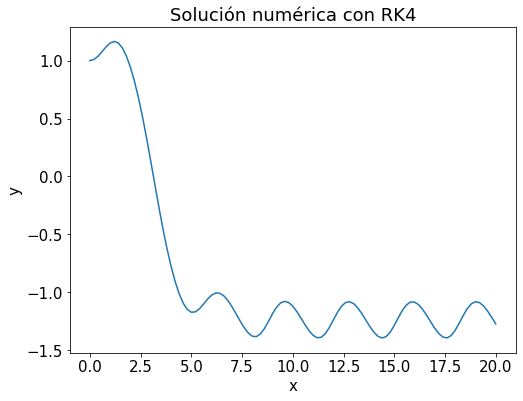

In [67]:
# El código es análogo a los casos anteriores, solo debemos agregar el nuevo paso
# y cambiar la ecuación.
def ecuacion_2(x_n,y_n):
  a = np.log(np.sin(x_n+y_n)**2+1)
  b = (-1.0)*np.cos(y_n)
  
  return a+b

def pasoRK4(h,x_n,y_n):
  g1 = ecuacion_2(x_n,y_n)
  g2 = ecuacion_2(x_n+(h/2.0),y_n+(h/2.0)*g1)
  g3 = ecuacion_2(x_n+(h/2.0),y_n+(h/2.0)*g2)
  g4 = ecuacion_2(x_n+h,y_n+h*g3)
  return (h/6.0)*(g1+2*g2+2*g3+g4)

# Ahora haremos 100 iteraciones para mayor precisión

condiciones_iniciales = np.array([0.0,1.0])
eje_x2 = np.linspace(0.0,20.0,101)
h = eje_x2[1]-eje_x2[0]
num_iteraciones = 100

eje_y_RK4 = np.zeros(101)
eje_y_RK4[0] = condiciones_iniciales[1]

i = 0
while i < num_iteraciones:
    eje_y_RK4[i+1] = eje_y_RK4[i]+pasoRK4(h,eje_x2[i],eje_y_RK4[i])
    i+=1

plt.rcParams.update({'font.size': 15})        # aumento tamaño letra

plt.figure(figsize=(8,6))
plt.plot(eje_x2,eje_y_RK4)
plt.title("Solución numérica con RK4")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Sabemos que hay infinitas soluciones para cada EDO, y que estas, en general, representan una familia de soluciones. Para comprender de manera más general esta EDO grafiquemos una pequeña familia de soluciones.

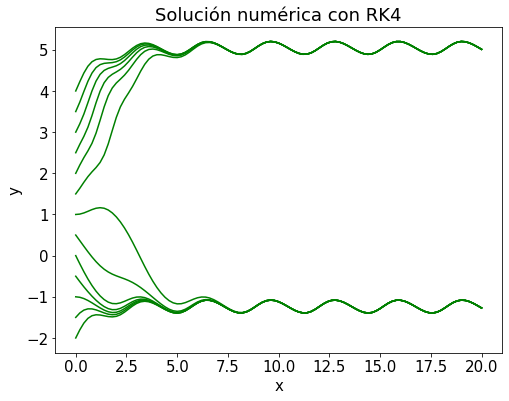

In [68]:
# ¡Atención!: esta parte del código es solo repetir muchas veces lo anterior 
# para distintos valores iniciales, se sugiere ver de manera rápida o pasar 
# al gráfico resultante.

c_i_1 = np.array([0.0,0.0])
c_i_2 = np.array([0.0,-1.0])
c_i_3 = np.array([0.0,-2.0])
c_i_4 = np.array([0.0,1.0])
c_i_5 = np.array([0.0,2.0])
c_i_6 = np.array([0.0,3.0])
c_i_7 = np.array([0.0,4.0])
c_i_8 = np.array([0.0,0.5])
c_i_9 = np.array([0.0,1.5])
c_i_10 = np.array([0.0,-1.5])
c_i_11 = np.array([0.0,-0.5])
c_i_12 = np.array([0.0,2.5])
c_i_13 = np.array([0.0,3.5])


eje_x2 = np.linspace(0.0,20.0,101)
h = eje_x2[1]-eje_x2[0]
num_iteraciones = 100

eje_y1 = np.zeros(101)
eje_y1[0] = c_i_1[1]

eje_y2 = np.zeros(101)
eje_y2[0] = c_i_2[1]

eje_y3 = np.zeros(101)
eje_y3[0] = c_i_3[1]

eje_y4 = np.zeros(101)
eje_y4[0] = c_i_4[1]

eje_y5 = np.zeros(101)
eje_y5[0] = c_i_5[1]

eje_y6 = np.zeros(101)
eje_y6[0] = c_i_6[1]

eje_y7 = np.zeros(101)
eje_y7[0] = c_i_7[1]

eje_y8 = np.zeros(101)
eje_y8[0] = c_i_8[1]

eje_y9 = np.zeros(101)
eje_y9[0] = c_i_9[1]

eje_y10 = np.zeros(101)
eje_y10[0] = c_i_10[1]

eje_y11 = np.zeros(101)
eje_y11[0] = c_i_11[1]

eje_y12 = np.zeros(101)
eje_y12[0] = c_i_12[1]

eje_y13 = np.zeros(101)
eje_y13[0] = c_i_13[1]


i = 0
while i < num_iteraciones:
    eje_y1[i+1] = eje_y1[i]+pasoRK4(h,eje_x2[i],eje_y1[i])
    eje_y2[i+1] = eje_y2[i]+pasoRK4(h,eje_x2[i],eje_y2[i])
    eje_y3[i+1] = eje_y3[i]+pasoRK4(h,eje_x2[i],eje_y3[i])
    eje_y4[i+1] = eje_y4[i]+pasoRK4(h,eje_x2[i],eje_y4[i])
    eje_y5[i+1] = eje_y5[i]+pasoRK4(h,eje_x2[i],eje_y5[i])
    eje_y6[i+1] = eje_y6[i]+pasoRK4(h,eje_x2[i],eje_y6[i])
    eje_y7[i+1] = eje_y7[i]+pasoRK4(h,eje_x2[i],eje_y7[i])
    eje_y8[i+1] = eje_y8[i]+pasoRK4(h,eje_x2[i],eje_y8[i])
    eje_y9[i+1] = eje_y9[i]+pasoRK4(h,eje_x2[i],eje_y9[i])
    eje_y10[i+1] = eje_y10[i]+pasoRK4(h,eje_x2[i],eje_y10[i])
    eje_y11[i+1] = eje_y11[i]+pasoRK4(h,eje_x2[i],eje_y11[i])
    eje_y12[i+1] = eje_y12[i]+pasoRK4(h,eje_x2[i],eje_y12[i])
    eje_y13[i+1] = eje_y13[i]+pasoRK4(h,eje_x2[i],eje_y13[i])
    

    i+=1

plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 15})

plt.plot(eje_x2,eje_y1, color = "green")
plt.plot(eje_x2,eje_y2, color = "green")
plt.plot(eje_x2,eje_y3, color = "green")
plt.plot(eje_x2,eje_y4, color = "green")
plt.plot(eje_x2,eje_y5, color = "green")
plt.plot(eje_x2,eje_y6, color = "green")
plt.plot(eje_x2,eje_y7, color = "green")
plt.plot(eje_x2,eje_y8, color = "green")
plt.plot(eje_x2,eje_y9, color = "green")
plt.plot(eje_x2,eje_y10, color = "green")
plt.plot(eje_x2,eje_y11, color = "green")
plt.plot(eje_x2,eje_y12, color = "green")
plt.plot(eje_x2,eje_y13, color = "green")


plt.title("Solución numérica con RK4")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Comentarios finales

Los métodos numéricos entregan aproximaciones, a veces muy buenas, de las soluciones de las EDOs en cuestión. Estos resultan muy útiles cuando tenemos ecuaciones que no podemos resolver y que queremos conocer su solución, por ejemplo, para estudiar un sistema físico. Tomemos el caso del movimiento del péndulo simple, que se rige bajo la siguiente ecuación de movimiento para el ángulo:

$$\frac{d^2\theta(t)}{dt^2}+\frac{g}{l}\sin(\theta(t)) = 0 $$ 

Esta EDO de segundo orden no posee solución analítica como tal, de modo que de querer estudiar de manera más precisa su movimiento podemos resolverla numéricamente.



